In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

DATAPATH = "../data"

In [2]:
mollib_25 = pd.read_csv(os.path.join(DATAPATH, "zairachem_outputs", "output_mollib_40e_2.5.csv"))
mollib_1 = pd.read_csv(os.path.join(DATAPATH, "zairachem_outputs", "output_mollib_40e_1.csv"))

data6_25 = pd.read_csv(os.path.join(DATAPATH, "zairachem_outputs", "output_data6_2.5.csv"))
data6_1 = pd.read_csv(os.path.join(DATAPATH, "zairachem_outputs", "output_data6_1.csv"))

eosi90_25 = pd.read_csv(os.path.join(DATAPATH, "zairachem_outputs", "output_eosi_s4_candidates_90_2.5.csv"))
eosi90_1 = pd.read_csv(os.path.join(DATAPATH, "zairachem_outputs", "output_eosi_s4_candidates_90_1.csv"))


In [3]:
#check different thresholds
print(len(data6_25[data6_25["clf_ex1_bin"]==1]))
print(len(data6_1[data6_1["clf_ex1_bin"]==1]))
print(len(mollib_25[mollib_25["clf_ex1_bin"]==1]))
print(len(mollib_1[mollib_1["clf_ex1_bin"]==1]))
print(len(eosi90_25[eosi90_25["clf_ex1_bin"]==1]))
print(len(eosi90_1[eosi90_1["clf_ex1_bin"]==1]))

8952
1920
552
274
87
41


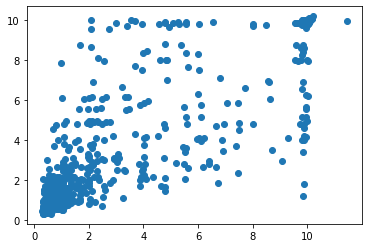

In [4]:
#check regression values from both models
mollib_25_reg = mollib_25["reg_raw"].tolist()
mollib_1_reg = mollib_1["reg_raw"].tolist()

plt.scatter(mollib_25_reg, mollib_1_reg)

In [5]:
#delete molecules that are predicted inactive with cut off 2.5 but active with cut off 1
data6_25_actives = data6_25[(data6_25["clf_ex1_bin"]==1) & (data6_25["reg_raw"]<=2.5)]
data6_1_actives = data6_1[(data6_1["clf_ex1_bin"]==1) & (data6_1["reg_raw"]<=1)]
data6_1_actives.reset_index(inplace=True)

mollib_25_actives = mollib_25[(mollib_25["clf_ex1_bin"]==1) & (mollib_25["reg_raw"]<=2.5)]
mollib_1_actives = mollib_1[(mollib_1["clf_ex1_bin"]==1) & (mollib_1["reg_raw"]<=1)]
mollib_1_actives.reset_index(inplace=True)

eosi90_25_actives = eosi90_25[(eosi90_25["clf_ex1_bin"]==1) & (eosi90_25["reg_raw"]<=2.5)]
eosi90_1_actives = eosi90_1[(eosi90_1["clf_ex1_bin"]==1) & (eosi90_1["reg_raw"]<=1)]
eosi90_1_actives.reset_index(inplace=True)


In [6]:
data6_25_smi = data6_25_actives["smiles"].tolist()
data6_1_smi = data6_1_actives["smiles"].tolist()

idx = []
for i,smi in enumerate(data6_1_smi):
    if smi not in data6_25_smi:
        idx += [i]

print(len(data6_1_actives))       
data6_1_actives.drop(index=idx, axis = 0, inplace=True)
print(len(data6_1_actives))

1118
1094


C:\Users\Gemma\Anaconda3\envs\malariaOSM\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
mollib_25_smi = mollib_25_actives["smiles"].tolist()
mollib_1_smi = mollib_1_actives["smiles"].tolist()

idx = []
for i,smi in enumerate(mollib_1_smi):
    if smi not in mollib_25_smi:
        idx += [i]

print(len(mollib_1_actives))       
mollib_1_actives.drop(index=idx, axis = 0, inplace=True)
print(len(mollib_1_actives))

202
201


In [8]:
eosi90_25_smi = eosi90_25_actives["smiles"].tolist()
eosi90_1_smi = eosi90_1_actives["smiles"].tolist()

idx = []
for i,smi in enumerate(eosi90_1_smi):
    if smi not in eosi90_25_smi:
        idx += [i]

print(len(eosi90_1_actives))       
eosi90_1_actives.drop(index=idx, axis = 0, inplace=True)
print(len(eosi90_1_actives))

35
35


In [34]:
data6 = data6_1_actives[["compound_id", "smiles", "clf_ex1"]]
data6.rename(columns={"clf_ex1": "proba1_1.0uM"}, inplace=True)
data6 = pd.merge(data6, data6_25_actives[["smiles", "clf_ex1", "reg_raw"]], on = "smiles", how="left")
data6.rename(columns={"clf_ex1":"proba1_2.5uM", "reg_raw": "IC50_pred"}, inplace=True)

C:\Users\Gemma\Anaconda3\envs\malariaOSM\lib\site-packages\pandas\core\frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
mollib = mollib_1_actives[["compound_id", "smiles", "clf_ex1"]]
mollib.rename(columns={"clf_ex1": "proba1_1.0uM"}, inplace=True)
mollib = pd.merge(mollib, mollib_25_actives[["smiles", "clf_ex1", "reg_raw"]], on = "smiles", how="left")
mollib.rename(columns={"clf_ex1":"proba1_2.5uM", "reg_raw": "IC50_pred"}, inplace=True)

In [36]:
long_sel = pd.concat([data6, mollib])
long_sel.drop(columns="compound_id", inplace=True)
long_sel.to_csv(os.path.join(DATAPATH, "High_actives_all.csv"), index=False)

In [37]:
eosi90 = eosi90_1_actives[["compound_id", "smiles", "clf_ex1"]]
eosi90.rename(columns={"clf_ex1": "proba1_1.0uM"}, inplace=True)
eosi90 = pd.merge(eosi90, eosi90_25_actives[["smiles", "clf_ex1", "reg_raw"]], on = "smiles", how="left")
eosi90.rename(columns={"clf_ex1":"proba1_2.5uM", "reg_raw": "IC50_pred"}, inplace=True)
eosi90.to_csv(os.path.join(DATAPATH, "high_actives_selection.csv"), index=False)

In [16]:
#molecular visualization

df = pd.read_csv(os.path.join(DATAPATH, "high_actives_selection.csv"))
df.rename(columns = {"smiles":"smiles_col"})
df["IC50_pred"] = df["IC50_pred"].round(decimals=3)

In [21]:
help(mols2grid.MolGrid.to_table)

Help on function to_table in module mols2grid.molgrid:

to_table(self, subset=None, tooltip=None, n_cols=6, cell_width=160, border='1px solid #cccccc', gap=0, fontsize='12pt', fontfamily="'DejaVu', sans-serif", textalign='center', tooltip_fmt='<strong>{key}</strong>: {value}', tooltip_trigger='click hover', tooltip_placement='bottom', hover_color='#e7e7e7', style=None, transform=None)
    Returns the HTML document for the "table" template
    
    Parameters
    ----------
    subset : list or None
        Columns to be displayed in each cell of the grid. Each
        column's value will be displayed from top to bottom in the same
        order given here. Use `"img"` for the image of the molecule.
        Default: all columns (with "img" in first position)
    tooltip : list or None
        Columns to be displayed as a tooltip when hovering/clicking on the
        image of a cell. Use `None` for no tooltip.
    tooltip_fmt : str
        Format string of each key/value pair in the tool

In [29]:
import mols2grid


grid = mols2grid.MolGrid(df, mapping={"smiles":"SMILES"}, subset=["compound_id", "img", "IC50_pred", tooltip=["SMILES"]])
#mols2grid.save(grid, output=os.path.join(DATAPATH, "selection.html"))

In [33]:
grid.save("selection.html", subset=["compound_id", "img", "IC50_pred"], tooltip=["SMILES"])